# feature matrix

import

In [2]:
import numpy as np
import pandas as pd
from scipy.signal import lfilter
from spectrum import arburg
import matplotlib
import json


**feature col**

In [4]:
fc = [
"jArithmeticMean",
"jAutoRegressiveModel",
"jBandPowerAlpha",
"jBandPowerBeta",
"jBandPowerDelta",
"jBandPowerGamma",
"jBandPowerTheta",
"jFirstDifference",
"jHjorthActivity",
"jHjorthComplexity",
"jHjorthMobility",
"jKurtosis",
"jLogRootSumOfSequentialVariation",
"jMaximum",
"jMeanCurveLength",
"jMeanEnergy",
"jMeanTeagerEnergy",
"jMedian",
"jMinimum",
"jNormalizedFirstDifference",
"jNormalizedSecondDifference",
"jRatioBandPowerAlphaBeta",
"jSecondDifference",
"jSkewness",
"jStandardDeviation",
"jVariance"]

print(fc)

['jArithmeticMean', 'jAutoRegressiveModel', 'jBandPowerAlpha', 'jBandPowerBeta', 'jBandPowerDelta', 'jBandPowerGamma', 'jBandPowerTheta', 'jFirstDifference', 'jHjorthActivity', 'jHjorthComplexity', 'jHjorthMobility', 'jKurtosis', 'jLogRootSumOfSequentialVariation', 'jMaximum', 'jMeanCurveLength', 'jMeanEnergy', 'jMeanTeagerEnergy', 'jMedian', 'jMinimum', 'jNormalizedFirstDifference', 'jNormalizedSecondDifference', 'jRatioBandPowerAlphaBeta', 'jSecondDifference', 'jSkewness', 'jStandardDeviation', 'jVariance']


**data structure**


In [5]:
data = {
    "feature_matrix_column_name":fc,
    "feature_count":len(fc),
    "subjects":[
        
    ]
}

print(data["feature_matrix_column_name"],data["feature_count"])

['jArithmeticMean', 'jAutoRegressiveModel', 'jBandPowerAlpha', 'jBandPowerBeta', 'jBandPowerDelta', 'jBandPowerGamma', 'jBandPowerTheta', 'jFirstDifference', 'jHjorthActivity', 'jHjorthComplexity', 'jHjorthMobility', 'jKurtosis', 'jLogRootSumOfSequentialVariation', 'jMaximum', 'jMeanCurveLength', 'jMeanEnergy', 'jMeanTeagerEnergy', 'jMedian', 'jMinimum', 'jNormalizedFirstDifference', 'jNormalizedSecondDifference', 'jRatioBandPowerAlphaBeta', 'jSecondDifference', 'jSkewness', 'jStandardDeviation', 'jVariance'] 26


**Arithmetic Mean**

In [6]:
def jArithmeticMean(X, unused_param=None):
    # Calculate the arithmetic mean
    AM = np.mean(X)
    return AM

# Example usage:
# X = your_data_here
# AM = jArithmeticMean(X)
# print("Arithmetic Mean:", AM)

**Autoregressive Coefficients**

In [7]:
# from scipy.signal import lfilter
# import numpy as np

# def jAutoRegressiveModel(X, opts=None):
#     # Parameters
#     order = 4  # Default order
#     if opts and 'order' in opts:
#         order = opts['order']
    
#     # Estimate AR parameters using Yule-Walker equations
#     AR_coefficients = lfilter([1], np.concatenate([[1], -arburg(X, order)[0]]), X)[1:]

    
#     return AR_coefficients

# # Example usage:
# x = [44.19751110586074,22.51694221959551,-14.661503641173894,3.430490124108921,-0.6637413122876787,0.21048576173766165,1.8857324738181789,30.224629092087735,10.497933096629001,-46.305758409061596,-26.686669623393918,-16.73913482440437,1.611175625560124,0.38820037067304436,-32.369100007196614,7.2309846565609694,30.41243811165936,-27.886890818882524,6.595347009968799,-48.32099412589681,-20.313572999938835,23.173236585298483,-11.486419748073736,-24.985393533592752,-7.843453274628753,-26.87925152240344,-25.474783619424006,-13.280940280717413,-75.77547828244083,-12.724896681763518,445.9112401690606,-39.27226486224289]
# opts = {'order': 4}
# print(len(x))
# AR_coefficients = jAutoRegressiveModel(x, opts)
# print(AR_coefficients)
# print(len(AR_coefficients))


In [8]:
from spectrum import arburg

def jAutoRegressiveModel(X, order=2):
    AR, _, _ = arburg(X, order)
    return AR[1]


# Example usage:
x = [44.19751110586074,22.51694221959551,-14.661503641173894,3.430490124108921,-0.6637413122876787,0.21048576173766165,1.8857324738181789,30.224629092087735,10.497933096629001,-46.305758409061596,-26.686669623393918,-16.73913482440437,1.611175625560124,0.38820037067304436,-32.369100007196614,7.2309846565609694,30.41243811165936,-27.886890818882524,6.595347009968799,-48.32099412589681,-20.313572999938835,23.173236585298483,-11.486419748073736,-24.985393533592752,-7.843453274628753,-26.87925152240344,-25.474783619424006,-13.280940280717413,-75.77547828244083,-12.724896681763518,445.9112401690606,-39.27226486224289]
# opts = {'order':4}
AR_coefficients = jAutoRegressiveModel(x)
print(np.abs(AR_coefficients))


0.2734540897226458


**Band Power Alpha**

In [9]:
opts = {'fs': 200}

In [10]:


from scipy.signal import welch

def jBandPowerAlpha(X, opts=None):
    # Parameters
    f_low = 8  # 8 Hz
    f_high = 12  # 12 Hz

    # Check if 'fs' is specified in opts
    if opts is not None and 'fs' in opts:
        fs = opts['fs']
    else:
        fs = 200  # Default sampling frequency (you may need to replace this with your actual value)

    # Calculate power spectral density using Welch method
    f, Pxx = welch(X, fs, nperseg=256)  # You can adjust nperseg based on your data

    # Extract power in the alpha band
    BPA = sum(Pxx[(f_low <= f) & (f <= f_high)]) * (fs / 2) / len(Pxx)

    return BPA

    # Parameters
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('./Final_data/subject_1/session_2_BL.csv')

# Get all columns
columns = df.columns
print(len(df[columns[0]]))
print(jBandPowerAlpha(df[columns[0]]))

# Example usage:
# X = your_data_here
# opts = {'fs': 200}  # Optional, you can omit this parameter
# BPA = jBandPowerAlpha(x, opts)
# print("Alpha Band Power:", BPA)

56772
2.808286573229102


**Band Power Beta**

In [11]:
def jBandPowerBeta(X, opts=None):
    # Parameters
    f_low = 12   # 12 Hz
    f_high = 30  # 30 Hz
    
    # Sampling frequency
    fs = 200
    if opts is not None and 'fs' in opts:
        fs = opts['fs']
    
    # Band power calculation using Welch method
    f, Pxx = welch(X, fs, nperseg=len(X))
    
    # Indices corresponding to the beta band (12-30 Hz)
    beta_indices = np.where((f >= f_low) & (f <= f_high))[0]
    
    # Band power in the beta band
    BPB = np.sum(Pxx[beta_indices])
    
    return BPB

import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('./Final_data/subject_1/session_2_BL.csv')

# Get all columns
columns = df.columns
print(jBandPowerBeta(df[columns[0]]))
# Example usage:
# X = your_data_here
# opts = {'fs': your_sampling_frequency}  # Optional, you can omit this parameter
# BPB = jBandPowerBeta(X, opts)
# print("Beta Band Power:", BPB)

1373.1275559701307


**Band Power Delta**

In [12]:
def jBandPowerDelta(X, opts=None):
    # Parameters
    f_low = 1    # 1 Hz
    f_high = 4   # 4 Hz
    
    # Sampling frequency
    fs = 200
    if opts is not None and 'fs' in opts:
        fs = opts['fs']
    
    # Band power calculation using Welch method
    f, Pxx = welch(X, fs, nperseg=len(X))
    
    # Indices corresponding to the delta band (1-4 Hz)
    delta_indices = np.where((f >= f_low) & (f <= f_high))[0]
    
    # Band power in the delta band
    BPD = np.sum(Pxx[delta_indices])
    
    return BPD

import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('./Final_data/subject_1/session_2_BL.csv')

# Get all columns
columns = df.columns
print(jBandPowerDelta(df[columns[0]]))
# Example usage:
# X = your_data_here
# opts = {'fs': your_sampling_frequency}  # Optional, you can omit this parameter
# BPD = jBandPowerDelta(X, opts)
# print("Delta Band Power:", BPD)

70381.96465050828


**Band Power Gamma**

In [14]:
import numpy as np
from scipy.signal import welch

def jBandPowerGamma(X, opts=None):
    # Parameters
    f_low = 30   # 30 Hz
    f_high = 64  # 64 Hz
    
    # Sampling frequency
    fs = 200
    if opts is not None and 'fs' in opts:
        fs = opts['fs']
    
    # Band power calculation using Welch method
    f, Pxx = welch(X, fs, nperseg=len(X))
    
    # Indices corresponding to the gamma band (30-64 Hz)
    gamma_indices = np.where((f >= f_low) & (f <= f_high))[0]
    
    # Band power in the gamma band
    BPG = np.sum(Pxx[gamma_indices])
    
    return BPG

import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('./Final_data/subject_1/session_2_BL.csv')

# Get all columns
columns = df.columns
print(jBandPowerGamma(df[columns[0]]))
# Example usage:
# X = your_data_here
# opts = {'fs': your_sampling_frequency}  # Optional, you can omit this parameter
# BPG = jBandPowerGamma(X, opts)
# print("Gamma Band Power:", BPG)


1934.0598027186113


**Band Power Theta**

In [15]:
import numpy as np
from scipy.signal import welch

def jBandPowerTheta(X, opts=None):
    # Parameters
    f_low = 4    # 4 Hz
    f_high = 8   # 8 Hz
    
    # Sampling frequency
    fs = 200
    if opts is not None and 'fs' in opts:
        fs = opts['fs']
    
    # Band power calculation using Welch method
    f, Pxx = welch(X, fs, nperseg=len(X))
    
    # Indices corresponding to the theta band (4-8 Hz)
    theta_indices = np.where((f >= f_low) & (f <= f_high))[0]
    
    # Band power in the theta band
    BPT = np.sum(Pxx[theta_indices])
    
    return BPT

import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('./Final_data/subject_1/session_2_BL.csv')

# Get all columns
columns = df.columns
print(jBandPowerTheta(df[columns[0]]))
# Example usage:
# X = your_data_here
# opts = {'fs': your_sampling_frequency}  # Optional, you can omit this parameter
# BPT = jBandPowerTheta(X, opts)
# print("Theta Band Power:", BPT)


9124.752312358867


First Difference

In [16]:
def jFirstDifference(X):
    T = len(X)
    Y = 0
    
    for t in range(1, T):
        Y += abs(X[t] - X[t - 1])
    
    FD = (1 / (T - 1)) * Y
    return FD

# Example usage:
# X = your_data_here
# FD = jFirstDifference(x, None)
# print("First Difference:", FD)


Hjorth Activity

In [17]:
def jHjorthActivity(X):
    sd = np.std(X)
    HA = sd ** 2
    return HA

# Example usage:
# X = your_data_here
# HA = jHjorthActivity(X, None)
# print("Hjorth Activity:", HA)

Hjorth complexity

In [19]:
import numpy as np

def jHjorthComplexity(X):
    # First & second derivative
    x0 = np.array(X)
    x1 = np.diff(np.concatenate(([0], x0)))
    x2 = np.diff(np.concatenate(([0], x1)))
    
    # Standard deviation of first & second derivative
    sd0 = np.std(x0)
    sd1 = np.std(x1)
    sd2 = np.std(x2)
    
    # Complexity
    HC = (sd2 / sd1) / (sd1 / sd0)
    
    return HC

# Example usage:
# X = your_data_here
# HC = jHjorthComplexity(X, None)
# print("Hjorth Complexity:", HC)


Hjorth Mobility

In [20]:
def jHjorthMobility(X):
    # First derivative
    x0 = np.array(X)
    x1 = np.diff(np.concatenate(([0], x0)))
    
    # Standard deviation
    sd0 = np.std(x0)
    sd1 = np.std(x1)
    
    # Mobility
    HM = sd1 / sd0
    
    return HM

# Example usage:
# X = your_data_here
# HM = jHjorthMobility(X, None)
# print("Hjorth Mobility:", HM)

Kurtosis

In [21]:
from scipy.stats import kurtosis

def jKurtosis(X):
    # Kurtosis calculation
    KURT = kurtosis(X)
    return KURT

# Example usage:
# X = your_data_here
# KURT = jKurtosis(X, None)
# print("Kurtosis:", KURT)

Log Energy Entropy

In [22]:
def jLogEnergyEntropy(X):
    # Log energy entropy calculation
    LogEn = np.sum(np.log(X**2))
    return LogEn

# Example usage:
# X = your_data_here
# LogEn = jLogEnergyEntropy(X, None)
# print("Log Energy Entropy:", LogEn)

LogRoot Sum Of Sequential Variation

In [23]:
def jLogRootSumOfSequentialVariation(X):
    N = len(X)
    Y = np.zeros(N-1)

    for i in range(1, N):
        Y[i-1] = (X[i] - X[i-1]) ** 2

    LRSSV = np.log10(np.sqrt(np.sum(Y)))
    return LRSSV

# Example usage:
# X = your_data_here
# LRSSV = jLogRootSumOfSequentialVariation(X, None)
# print("Log Root Sum of Sequential Variation:", LRSSV)

Maximum

In [24]:
def jMaximum(X):
    # Maximum value calculation
    X_max = max(X)
    return X_max

# Example usage:
# X = your_data_here
# X_max = jMaximum(X, None)
# print("Maximum Value:", X_max)


Mean Curve Length

In [25]:
def jMeanCurveLength(X):
    N = len(X)
    Y = 0

    for m in range(1, N):
        Y += abs(X[m] - X[m-1])

    MCL = (1 / N) * Y
    return MCL

# Example usage:
# X = your_data_here
# MCL = jMeanCurveLength(X, None)
# print("Mean Curve Length:", MCL)

Mean Energy

In [26]:
def jMeanEnergy(X):
    # Mean energy calculation
    ME = np.mean(np.square(X))
    return ME

# Example usage:
# X = your_data_here
# ME = jMeanEnergy(X, None)
# print("Mean Energy:", ME)

Mean Teager Energy

In [27]:
def jMeanTeagerEnergy(X):
    N = len(X)
    Y = 0

    for m in range(2, N):
        Y += (X[m-1] ** 2) - X[m] * X[m-2]

    MTE = (1 / N) * Y
    return MTE

# Example usage:
# X = your_data_here
# MTE = jMeanTeagerEnergy(X, None)
# print("Mean Teager Energy:", MTE)

Median

In [28]:
def jMedian(X):
    # Median calculation
    X_med = np.median(X)
    return X_med

# Example usage:
# X = your_data_here
# X_med = jMedian(X, None)
# print("Median:", X_med)

Minimum

In [29]:
def jMinimum(X):
    # Minimum value calculation
    X_min = min(X)
    return X_min

# Example usage:
# X = your_data_here
# X_min = jMinimum(X, None)
# print("Minimum Value:", X_min)

Normalized First Difference

In [30]:
def jNormalizedFirstDifference(X):
    T = len(X)
    Y = 0

    for t in range(1, T):
        Y += abs(X[t] - X[t-1])

    FD = (1 / (T - 1)) * Y
    NFD = FD / np.std(X)

    return NFD

# Example usage:
# X = your_data_here
# NFD = jNormalizedFirstDifference(X, None)
# print("Normalized First Difference:", NFD)

Normalized Second Difference

In [31]:

import numpy as np

def jNormalizedSecondDifference(X):
    T = len(X)
    # print(T)
    Y = 0
    if(T-2==0):
        return 10000000000
    for t in range(1, T - 2):
        Y = Y + abs(X[t + 2] - X[t])
    
    SD = (1 / (T - 2)) * Y
    std= np.std(X);
    if std==0:
        return 10000000000
    NSD = SD / std
    
    return NSD

# import pandas as pd

# # Read the CSV file into a DataFrame
# df = pd.read_csv('./Final_data/subject_1/session_2_BL.csv')

# # Get all columns
# columns = df.columns
# print(jNormalizedSecondDifference(df[columns[0]]))

# Example usage:
# X = your_data_here
# NFD = jNormalizedFirstDifference(X, None)
# print("Normalized First Difference:", NFD)


Ratio Band Power Alpha Beta

In [32]:
import scipy

def bandpower(x, fs, fmin, fmax):
    f, Pxx = scipy.signal.periodogram(x, fs=fs)
    ind_min = scipy.argmax(f > fmin) - 1
    ind_max = scipy.argmax(f > fmax) - 1
    return scipy.trapz(Pxx[ind_min: ind_max], f[ind_min: ind_max])

def jRatioBandPowerAlphaBeta(X, opts=None):
    # Parameters
    f_low1 = 8       # 8 Hz
    f_high1 = 12     # 12 Hz
    f_low2 = 12      # 12 Hz
    f_high2 = 30     # 30 Hz
    
    # Sampling frequency
    fs=200
    # if 'fs' in opts:
    #     fs = opts['fs']
    
    # Band power alpha
    BPA = bandpower(X, fs, f_low1, f_high1)
    
    # Band power beta
    BPB = bandpower(X, fs, f_low2, f_high2)
    
    # Ratio beta/alpha
    RBA = BPB / BPA
    
    return RBA

# Example usage:
# X = your_data_here
# opts = {'fs': 200}
# import pandas as pd

# # Read the CSV file into a DataFrame
# df = pd.read_csv('./Final_data/subject_1/session_2_BL.csv')

# # Get all columns
# columns = df.columns
# print(jRatioBandPowerAlphaBeta(df[columns[0]]))
# RBA = jRatioBandPowerAlphaBeta(X, opts)
# print("Ratio Band Power Alpha/Beta:", RBA)


Renyi Entropy

In [33]:
def jRenyiEntropy(X, opts=None):
    # Parameter
    alpha = 2  # alpha
    # if 'alpha' in opts:
    #     alpha = opts['alpha']
    
    # Convert probability using energy
    P = (X ** 2) / np.sum(X ** 2)
    
    # Entropy
    En = P ** alpha
    
    # Renyi Entropy
    ReEn = (1 / (1 - alpha)) * np.log2(np.sum(En))
    
    return ReEn

# Example usage:
# X = your_data_here
# opts = {'alpha': your_alpha_value}
# ReEn = jRenyiEntropy(X, opts)
# print("Renyi Entropy:", ReEn)

Second Difference

In [34]:
def jSecondDifference(X):
    T = len(X)
    Y = 0

    for t in range(2, T):
        Y += abs(X[t] - X[t-2])

    SD = (1 / (T - 2)) * Y
    return SD

# Example usage:
# X = your_data_here
# SD = jSecondDifference(X, None)
# print("Second Difference:", SD)


Shannon Entropy

In [35]:
def jShannonEntropy(X):
    # Convert probability using energy
    P = (X ** 2) / np.sum(X ** 2)
    
    # Entropy
    En = P * np.log2(P)
    
    # Shannon Entropy
    ShEn = -np.sum(En)
    
    return ShEn

# Example usage:
# X = your_data_here
# ShEn = jShannonEntropy(X, None)
# print("Shannon Entropy:", ShEn)

Skewness

In [36]:
from scipy.stats import skew

def jSkewness(X):
    # Skewness calculation
    SKEW = skew(X)
    return SKEW

# Example usage:
# X = your_data_here
# Skewness = jSkewness(X, None)
# print("Skewness:", Skewness)


Standered Deviation

In [37]:
def jStandardDeviation(X):
    N = len(X)
    mu = np.mean(X)
    SD = np.sqrt((1 / (N - 1)) * np.sum((X - mu) ** 2))
    return SD

# Example usage:
# X = your_data_here
# SD = jStandardDeviation(X, None)
# print("Standard Deviation:", SD)

Tsallis Entropy

In [38]:
def jTsallisEntropy(X, opts=None):
    # Parameter
    alpha = 2  # alpha
    # if 'alpha' in opts:
    #     alpha = opts['alpha']
    
    # Convert probability using energy
    C = (X ** 2) / np.sum(X ** 2)
    
    # Entropy
    En = C ** alpha
    
    # Tsallis Entropy
    TsEn = (1 / (alpha - 1)) * (1 - np.sum(En))

    return TsEn

# Example usage:
# X = your_data_here
# opts = {'alpha': your_alpha_value}
# TsEn = jTsallisEntropy(X, opts)
# print("Tsallis Entropy:", TsEn)

Variance

In [39]:
import numpy as np

def jVariance(X):
    N = len(X)
    mu = np.mean(X)
    VAR = (1 / (N - 1)) * np.sum((X - mu) ** 2)
    return VAR

# Example usage:
# X = your_data_here
# Variance = jVariance(X, None)
# print("Variance:", Variance)

test code for one person

In [40]:
import pandas as pd
import csv

# Read the CSV file into a DataFrame
df = pd.read_csv('./Final_data/subject_1/session_2_BL.csv')

# Get all columns
columns = df.columns

# Print the columns
# print("Columns:", columns)
# print(df[columns[0]][0])
ftm = []
for cl in columns:
    # print(cl)
    ft1=[]
    ft1.append(jArithmeticMean(df[cl]))
    ft1.append(np.abs(jAutoRegressiveModel(df[cl])))
    x=jBandPowerAlpha(df[cl])
    # print(len(x))
    ft1.append(x)
    x=jBandPowerBeta(df[cl])
    # print(x)
    ft1.append(x)
    x=jBandPowerDelta(df[cl])
    # print(x)
    ft1.append(x)
    ft1.append(jBandPowerGamma(df[cl]))
    ft1.append(jBandPowerTheta(df[cl]))
    ft1.append(jFirstDifference(df[cl]))
    ft1.append(jHjorthActivity(df[cl]))
    ft1.append(jHjorthComplexity(df[cl]))
    ft1.append(jHjorthMobility(df[cl]))
    ft1.append(kurtosis(df[cl]))
    ft1.append(jLogEnergyEntropy(df[cl]))
    ft1.append(jLogRootSumOfSequentialVariation(df[cl]))
    ft1.append(jMaximum(df[cl]))
    ft1.append(jMeanCurveLength(df[cl]))
    ft1.append(jMeanEnergy(df[cl]))
    ft1.append(jMeanTeagerEnergy(df[cl]))
    ft1.append(jMedian(df[cl]))
    ft1.append(jMinimum(df[cl]))
    ft1.append(jNormalizedFirstDifference(df[cl]))
    ft1.append(jNormalizedSecondDifference(df[cl]))
    ft1.append(jRatioBandPowerAlphaBeta(df[cl]))
    ft1.append(jRenyiEntropy(df[cl]))
    ft1.append(jSecondDifference(df[cl]))
    ft1.append(jShannonEntropy(df[cl]))
    ft1.append(jSkewness(df[cl]))
    ft1.append(jStandardDeviation(df[cl]))
    ft1.append(jTsallisEntropy(df[cl]))
    ft1.append(jVariance(df[cl]))
    
    ftm.append(ft1)
print(ftm)
# print(len(ftm))
# print(len(ftm[0]))
with open('output.csv', 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile)
    csvwriter.writerows(ftm)

C:\Users\msriz\AppData\Local\Temp\ipykernel_35332\1932691423.py:5: DeprecationWarning: scipy.argmax is deprecated and will be removed in SciPy 2.0.0, use numpy.argmax instead
  ind_min = scipy.argmax(f > fmin) - 1
C:\Users\msriz\AppData\Local\Temp\ipykernel_35332\1932691423.py:6: DeprecationWarning: scipy.argmax is deprecated and will be removed in SciPy 2.0.0, use numpy.argmax instead
  ind_max = scipy.argmax(f > fmax) - 1
C:\Users\msriz\AppData\Local\Temp\ipykernel_35332\1932691423.py:7: DeprecationWarning: scipy.trapz is deprecated and will be removed in SciPy 2.0.0, use numpy.trapz instead
  return scipy.trapz(Pxx[ind_min: ind_max], f[ind_min: ind_max])


KeyboardInterrupt: 

In [ ]:
import json
def convert_np_array_to_list(np_array):
    return np_array.tolist() if isinstance(np_array, np.ndarray) else np_array
p1d = {
            "session1": {"MA": [[]], "BL": [[]]},
            "session2": {"MA": [[]], "BL": [[]]},
            "session3": {"MA": [[]], "BL": [[]]}
}

for i in range(1,2):
    print(i)
    # Read the CSV file into a DataFrame
    df = pd.read_csv(f'./Final_data/subject_1/session_{i*2}_MA.csv')

    # Get all columns
    columns = df.columns
    
    ftm = []
    for cl in columns:
        # print(cl)
        ft1=[]
        ft1.append(jArithmeticMean(df[cl]))
        ft1.append(np.abs(jAutoRegressiveModel(df[cl])))
        x=jBandPowerAlpha(df[cl])
        # print(len(x))
        ft1.append(x)
        x=jBandPowerBeta(df[cl])
        # print(x)
        ft1.append(x)
        x=jBandPowerDelta(df[cl])
        # print(x)
        ft1.append(x)
        ft1.append(jBandPowerGamma(df[cl]))
        ft1.append(jBandPowerTheta(df[cl]))
        ft1.append(jFirstDifference(df[cl]))
        ft1.append(jHjorthActivity(df[cl]))
        ft1.append(jHjorthComplexity(df[cl]))
        ft1.append(jHjorthMobility(df[cl]))
        ft1.append(kurtosis(df[cl]))
        ft1.append(jLogEnergyEntropy(df[cl]))
        ft1.append(jLogRootSumOfSequentialVariation(df[cl]))
        ft1.append(jMaximum(df[cl]))
        ft1.append(jMeanCurveLength(df[cl]))
        ft1.append(jMeanEnergy(df[cl]))
        ft1.append(jMeanTeagerEnergy(df[cl]))
        ft1.append(jMedian(df[cl]))
        ft1.append(jMinimum(df[cl]))
        ft1.append(jNormalizedFirstDifference(df[cl]))
        ft1.append(jNormalizedSecondDifference(df[cl]))
        ft1.append(jRatioBandPowerAlphaBeta(df[cl]))
        ft1.append(jRenyiEntropy(df[cl]))
        ft1.append(jSecondDifference(df[cl]))
        ft1.append(jShannonEntropy(df[cl]))
        ft1.append(jSkewness(df[cl]))
        ft1.append(jStandardDeviation(df[cl]))
        ft1.append(jTsallisEntropy(df[cl]))
        ft1.append(jVariance(df[cl]))

        ftm.append(ft1)
    p1d["session1"]["MA"]=ftm
print(p1d["session1"]["MA"][0])

# with open('output.json', 'w') as json_file:
#     json.dump(p1d, json_file, indent=4)





1


C:\Users\msriz\AppData\Local\Temp\ipykernel_10492\2356357922.py:5: DeprecationWarning: scipy.argmax is deprecated and will be removed in SciPy 2.0.0, use numpy.argmax instead
  ind_min = scipy.argmax(f > fmin) - 1
C:\Users\msriz\AppData\Local\Temp\ipykernel_10492\2356357922.py:6: DeprecationWarning: scipy.argmax is deprecated and will be removed in SciPy 2.0.0, use numpy.argmax instead
  ind_max = scipy.argmax(f > fmax) - 1
C:\Users\msriz\AppData\Local\Temp\ipykernel_10492\2356357922.py:7: DeprecationWarning: scipy.trapz is deprecated and will be removed in SciPy 2.0.0, use numpy.trapz instead
  return scipy.trapz(Pxx[ind_min: ind_max], f[ind_min: ind_max])


[36.38758369868554, array([0.11385213, 0.30024542, 0.07033243]), 3.4172213712189823, 1339.6913430777863, 79997.13939419587, 1549.462096689309, 8925.592767608168, 3.5386317709379758, 1111.967087243166, 10.604609501067712, 0.14038952852830758, 8.075188988365946, 378177.2174354473, 3.048644989437858, 292.19458893190193, 3.538569879695808, 2436.0233346720115, 19.510150572781512, 30.83035682323936, -94.91783377572396, 0.10611808545077281, 0.14028487121084257, 1.2185454477279023, 13.23447933468119, 4.678023743919311, 14.363970555013282, 2.0239139629956333, 33.34646212220396, 0.9998962412470899, 1111.9865360675833]


In [ ]:
import json

p1d = {
            "session1": {"MA": [[]], "BL": [[]]},
            "session2": {"MA": [[]], "BL": [[]]},
            "session3": {"MA": [[]], "BL": [[]]}
}

for i in range(1,4):
    # print(i)
    # Read the CSV file into a DataFrame
    for j in range(0,2):
        if j==0:
            df = pd.read_csv(f'./Final_data/subject_1/session_{i*2}_MA.csv')
        else:
            df = pd.read_csv(f'./Final_data/subject_1/session_{i*2}_BL.csv')

        # Get all columns
        columns = df.columns

        ftm = []
        for cl in columns:
            # print(cl)
            ft1=[]
            ft1.append(jArithmeticMean(df[cl]))
            ft1.append(np.abs(jAutoRegressiveModel(df[cl])).tolist())
            x=jBandPowerAlpha(df[cl])
            # print(len(x))
            ft1.append(x)
            x=jBandPowerBeta(df[cl])
            # print(x)
            ft1.append(x)
            x=jBandPowerDelta(df[cl])
            # print(x)
            ft1.append(x)
            ft1.append(jBandPowerGamma(df[cl]))
            ft1.append(jBandPowerTheta(df[cl]))
            ft1.append(jFirstDifference(df[cl]))
            ft1.append(jHjorthActivity(df[cl]))
            ft1.append(jHjorthComplexity(df[cl]))
            ft1.append(jHjorthMobility(df[cl]))
            ft1.append(kurtosis(df[cl]))
            ft1.append(jLogEnergyEntropy(df[cl]))
            ft1.append(jLogRootSumOfSequentialVariation(df[cl]))
            ft1.append(jMaximum(df[cl]))
            ft1.append(jMeanCurveLength(df[cl]))
            ft1.append(jMeanEnergy(df[cl]))
            ft1.append(jMeanTeagerEnergy(df[cl]))
            ft1.append(jMedian(df[cl]))
            ft1.append(jMinimum(df[cl]))
            ft1.append(jNormalizedFirstDifference(df[cl]))
            ft1.append(jNormalizedSecondDifference(df[cl]))
            ft1.append(jRatioBandPowerAlphaBeta(df[cl]))
            ft1.append(jRenyiEntropy(df[cl]))
            ft1.append(jSecondDifference(df[cl]))
            ft1.append(jShannonEntropy(df[cl]))
            ft1.append(jSkewness(df[cl]))
            ft1.append(jStandardDeviation(df[cl]))
            ft1.append(jTsallisEntropy(df[cl]))
            ft1.append(jVariance(df[cl]))

            ftm.append(ft1)
        if j==0:
            p1d[f"session{i}"]["MA"]=ftm
        else:
            p1d[f"session{i}"]["BL"]=ftm
        
# print(p1d["session1"]["MA"][0])

with open('output.json', 'w') as json_file:
    json.dump(p1d, json_file, indent=2)





C:\Users\msriz\AppData\Local\Temp\ipykernel_10492\2356357922.py:5: DeprecationWarning: scipy.argmax is deprecated and will be removed in SciPy 2.0.0, use numpy.argmax instead
  ind_min = scipy.argmax(f > fmin) - 1
C:\Users\msriz\AppData\Local\Temp\ipykernel_10492\2356357922.py:6: DeprecationWarning: scipy.argmax is deprecated and will be removed in SciPy 2.0.0, use numpy.argmax instead
  ind_max = scipy.argmax(f > fmax) - 1
C:\Users\msriz\AppData\Local\Temp\ipykernel_10492\2356357922.py:7: DeprecationWarning: scipy.trapz is deprecated and will be removed in SciPy 2.0.0, use numpy.trapz instead
  return scipy.trapz(Pxx[ind_min: ind_max], f[ind_min: ind_max])
C:\Users\msriz\AppData\Local\Temp\ipykernel_10492\2356357922.py:5: DeprecationWarning: scipy.argmax is deprecated and will be removed in SciPy 2.0.0, use numpy.argmax instead
  ind_min = scipy.argmax(f > fmin) - 1
C:\Users\msriz\AppData\Local\Temp\ipykernel_10492\2356357922.py:6: DeprecationWarning: scipy.argmax is deprecated and wi

In [ ]:
# data["subjects"].append(p1d)
# print(p1d)
print(len(data["subjects"]))

0


In [ ]:
for sub in range(1,30):
    pxd = {
            "session1": {"MA": [[]], "BL": [[]]},
            "session2": {"MA": [[]], "BL": [[]]},
            "session3": {"MA": [[]], "BL": [[]]}
    }

    for i in range(1,4):
        # print(i)
        # Read the CSV file into a DataFrame
        for j in range(0,2):
            if j==0:
                df = pd.read_csv(f'./Final_data/subject_{sub}/session_{i*2}_MA.csv')
            else:
                df = pd.read_csv(f'./Final_data/subject_{sub}/session_{i*2}_BL.csv')

            # Get all columns
            columns = df.columns

            ftm = []
            for cl in columns:
                # print(cl)
                ft1=[]
                ft1.append(jArithmeticMean(df[cl]))
                ft1.append(np.abs(jAutoRegressiveModel(df[cl])).tolist())
                x=jBandPowerAlpha(df[cl])
                # print(len(x))
                ft1.append(x)
                x=jBandPowerBeta(df[cl])
                # print(x)
                ft1.append(x)
                x=jBandPowerDelta(df[cl])
                # print(x)
                ft1.append(x)
                ft1.append(jBandPowerGamma(df[cl]))
                ft1.append(jBandPowerTheta(df[cl]))
                ft1.append(jFirstDifference(df[cl]))
                ft1.append(jHjorthActivity(df[cl]))
                ft1.append(jHjorthComplexity(df[cl]))
                ft1.append(jHjorthMobility(df[cl]))
                ft1.append(kurtosis(df[cl]))
                # ft1.append(jLogEnergyEntropy(df[cl]))
                ft1.append(jLogRootSumOfSequentialVariation(df[cl]))
                ft1.append(jMaximum(df[cl]))
                ft1.append(jMeanCurveLength(df[cl]))
                ft1.append(jMeanEnergy(df[cl]))
                ft1.append(jMeanTeagerEnergy(df[cl]))
                ft1.append(jMedian(df[cl]))
                ft1.append(jMinimum(df[cl]))
                ft1.append(jNormalizedFirstDifference(df[cl]))
                ft1.append(jNormalizedSecondDifference(df[cl]))
                ft1.append(jRatioBandPowerAlphaBeta(df[cl]))
                # ft1.append(jRenyiEntropy(df[cl]))
                ft1.append(jSecondDifference(df[cl]))
                # ft1.append(jShannonEntropy(df[cl]))
                ft1.append(jSkewness(df[cl]))
                ft1.append(jStandardDeviation(df[cl]))
                # ft1.append(jTsallisEntropy(df[cl]))
                ft1.append(jVariance(df[cl]))

                ftm.append(ft1)
            if j==0:
                pxd[f"session{i}"]["MA"]=ftm
            else:
                pxd[f"session{i}"]["BL"]=ftm
    data["subjects"].append(pxd)

with open('feature_final.json', 'w') as json_file:
    json.dump(data, json_file, indent=2)

C:\Users\msriz\AppData\Local\Temp\ipykernel_10492\2356357922.py:5: DeprecationWarning: scipy.argmax is deprecated and will be removed in SciPy 2.0.0, use numpy.argmax instead
  ind_min = scipy.argmax(f > fmin) - 1
C:\Users\msriz\AppData\Local\Temp\ipykernel_10492\2356357922.py:6: DeprecationWarning: scipy.argmax is deprecated and will be removed in SciPy 2.0.0, use numpy.argmax instead
  ind_max = scipy.argmax(f > fmax) - 1
C:\Users\msriz\AppData\Local\Temp\ipykernel_10492\2356357922.py:7: DeprecationWarning: scipy.trapz is deprecated and will be removed in SciPy 2.0.0, use numpy.trapz instead
  return scipy.trapz(Pxx[ind_min: ind_max], f[ind_min: ind_max])
C:\Users\msriz\AppData\Local\Temp\ipykernel_10492\2356357922.py:5: DeprecationWarning: scipy.argmax is deprecated and will be removed in SciPy 2.0.0, use numpy.argmax instead
  ind_min = scipy.argmax(f > fmin) - 1
C:\Users\msriz\AppData\Local\Temp\ipykernel_10492\2356357922.py:6: DeprecationWarning: scipy.argmax is deprecated and wi

Extact for any subject

In [ ]:
subject = int(input("enter subject number: "))
ses = int(input("Enter session "))
import json
with open("./feature_final.json", 'r') as json_file:
    data = json.load(json_file)
    # print(data)
print(f"MA feature matrix for subject {subject}")
# print("afdbgld")
MA_data = data["subjects"][subject-1][f"session{ses}"]["MA"]
BL_data = data["subjects"][subject-1][f"session{ses}"]["BL"]
# print(data["subjects"][0]["session1"]["MA"])
for x in MA_data:
    print(x)

print(f"BL feature matrix for subject {subject}")
for x in BL_data:
    print(x)


MA feature matrix for subject 1
[30.830652183372504, [0.05457854696541926, 0.2836728923100539, 0.001013585020768172], 3.244264869875964, 1455.884286004598, 58367.549937782554, 2233.5530043275826, 6101.41369594577, 4.062909391727035, 1096.1621445422284, 9.15177931508064, 0.16790854402270222, 6.8677167782040645, 370632.7252951943, 3.122785133719198, 295.18648422760515, 4.062838083841542, 2046.6912585943203, 25.308241042842102, 29.599340085152747, -144.42535027783302, 0.12271558927173126, 0.15894934052653573, 1.5369780809097047, 13.494566494055642, 5.262634290969552, 14.504262001514002, 0.3725461772001881, 33.10863004652538, 0.9999133575535085, 1096.181383557683]
[8.680093770454183, [0.0114045448103061, 0.2438318350027049, 0.03157449985647681], 3.3059618390524976, 1556.1212693907119, 59987.18753573477, 1927.8166529020018, 6288.292380653278, 3.8825642294684717, 1119.7571478102072, 9.459413138700194, 0.16326140117477891, 6.933895149427073, 288193.74081341224, 3.1152916019933286, 279.4119968

extracting in csv file

In [ ]:
import json
import numpy as np
import csv

# Specify the path to your JSON file
# json_file_path = 'path/to/your/file.json'

# Open the file for reading
with open("./feature_final.json", 'r') as file:
    # Load the JSON data
    data = json.load(file)



# print(data_per)
# Now 'data' contains the contents of the JSON file as a Python dictionary
# print(data["subjects"][0]["session1"]["BL"])
data_mat =[]
for i in range(0,len(data["subjects"])):
    # print(i)
    data_per=[]
    for j in range(0,32):
        for k in range(0,30):
            data_per.append(data["subjects"][i]["session3"]["MA"][j][k])
    data_per.append(1)
    # print(data_per)
    # print(len(data_per))
    data_mat.append(data_per)
    data_per=[]
    for j in range(0,32):
        for k in range(0,30):
            data_per.append(data["subjects"][i]["session3"]["BL"][j][k])
    data_per.append(0)

    data_mat.append(data_per)

print(len(data_mat),len(data_mat[0]))
# for i in range(0,5):
#     print(data_mat[i])

with open("./feature_mat3.csv", 'w', newline='') as csvfile:
    # Create a CSV writer
    csv_writer = csv.writer(csvfile)

    # Write the header row
    # header = [f'col_{i}' for i in range(len(data_mat[0]))]
    # csv_writer.writerow(header)

    # Write the data rows
    csv_writer.writerows(data_mat)



58 961


In [ ]:
import json
with open("./feature_final.json", 'r') as file:
    # Load the JSON data
    data = json.load(file)
for i in range(0,32):
    print(data["subjects"][i]["session3"]["MA"][i][-5])

11.556647958880253
14.410296647283406
13.413694326840575
14.295820769333835
13.290644111585614
10.622028169101487
14.439906247063687
14.473727079139849
14.251340953578682
15.107426487826661
14.87530880634044
15.096240404099095
14.7238732448642
14.665366740766325
14.79024082537299
14.193654697821984
14.122215933713811
14.76752586952816
14.682437831476307
14.481168242406541
14.736158053627452
14.523052157878114
14.695192376097879
14.238421393433253
15.019864870329778
15.137356705561539
15.388908018565836
14.866534045279266
14.994417685023764


IndexError: list index out of range

In [ ]:
for sub in range(1,30):
    pxd = {
            "session1": {"MA":{"alpha":[[]],"beta":[[]],"delta":[[]],"theta":[[]]}, "BL": {"alpha":[[]],"beta":[[]],"delta":[[]],"theta":[[]]}},
            "session2": {"MA":{"alpha":[[]],"beta":[[]],"delta":[[]],"theta":[[]]}, "BL": {"alpha":[[]],"beta":[[]],"delta":[[]],"theta":[[]]}},
            "session3": {"MA":{"alpha":[[]],"beta":[[]],"delta":[[]],"theta":[[]]}, "BL": {"alpha":[[]],"beta":[[]],"delta":[[]],"theta":[[]]}}
    }

    for i in range(1,4):
        # print(i)
        # Read the CSV file into a DataFrame
        for state in ['BL', 'MA']:
            for band_type in ["alpha","beta","delta","theta"]:
                df = pd.read_csv(f'./processed_data/subject_{sub}/session_{i*2}_{state}_{band_type}.csv')
                # get all column 
                columns = df.columns
                # print(type(columns))
                index =0
                size = 1000
                ftm = []
                while index<len(df[columns[0]]):
                    for cl in columns:
                        # print(cl)
                        lst = df[cl][index:index+size].tolist()
                        # print(len(lst))
                        if(len(lst)<200):
                            break
                        ft1=[]
                        ft1.append(jArithmeticMean(lst))
                        ft1.append(np.abs(jAutoRegressiveModel(lst)).tolist())
                        x=jBandPowerAlpha(lst)
                        # print(len(x))
                        ft1.append(x)
                        x=jBandPowerBeta(lst)
                        # print(x)
                        ft1.append(x)
                        x=jBandPowerDelta(lst)
                        # print(x)
                        ft1.append(x)
                        ft1.append(jBandPowerGamma(lst))
                        ft1.append(jBandPowerTheta(lst))
                        ft1.append(jFirstDifference(lst))
                        ft1.append(jHjorthActivity(lst))
                        ft1.append(jHjorthComplexity(lst))
                        ft1.append(jHjorthMobility(lst))
                        ft1.append(kurtosis(lst))
                        # ft1.append(jLogEnergyEntropy(lst))
                        ft1.append(jLogRootSumOfSequentialVariation(lst))
                        ft1.append(jMaximum(lst))
                        ft1.append(jMeanCurveLength(lst))
                        ft1.append(jMeanEnergy(lst))
                        ft1.append(jMeanTeagerEnergy(lst))
                        ft1.append(jMedian(lst))
                        ft1.append(jMinimum(lst))
                        ft1.append(jNormalizedFirstDifference(lst))
                        ft1.append(jNormalizedSecondDifference(lst))
                        ft1.append(jRatioBandPowerAlphaBeta(lst))
                        # ft1.append(jRenyiEntropy(lst))
                        ft1.append(jSecondDifference(lst))
                        # ft1.append(jShannonEntropy(lst))
                        ft1.append(jSkewness(lst))
                        ft1.append(jStandardDeviation(lst))
                        # ft1.append(jTsallisEntropy(lst))
                        ft1.append(jVariance(lst))
                        ftm.append(ft1)
                    index = index + 800
                pxd[f"session{i}"][state][band_type]=ftm
                
        # 
    #             
    #         if j==0:
    #             pxd[f"session{i}"]["MA"]=ftm
    #         else:
    #             pxd[f"session{i}"]["BL"]=ftm
    data["subjects"].append(pxd)
    print(sub)

with open('feature_final1.json', 'w') as json_file:
    json.dump(data, json_file, indent=2)

In [ ]:
# Example list
original_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,21,22,33]

# Method 1: Using a loop
size = 10
sliced_lists_method_1 = []
i=0
while i<len(original_list):
    sublist = original_list[i:i+size]
    i=i+size
    print(sublist)
    sliced_lists_method_1.append(sublist)

# Method 2: Using list comprehension
# sliced_lists_method_2 = [original_list[i:i+size] for i in range(0, len(original_list), size)]

# # Display the results
# print("Method 1:", sliced_lists_method_1)
# print("Method 2:", sliced_lists_method_2)


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
[21, 22, 33]


In [ ]:
import pandas as pd
df = pd.read_csv(f'./processed_data/subject_{1}/session_{2}_{"MA"}_{"alpha"}.csv')
                # get all column 
columns = df.columns
print(type(columns))
print(df[columns[0]])

<class 'pandas.core.indexes.base.Index'>
0       -0.236102
1        0.489427
2        1.148187
3        1.654681
4        1.943277
           ...   
57170    0.066089
57171   -0.254378
57172   -0.487105
57173   -0.617140
57174   -0.645878
Name: F7, Length: 57175, dtype: float64


In [1]:
import json
import numpy as np
import csv
with open("./feature_final1.json", 'r') as file:
    # Load the JSON data
    data = json.load(file)
for i in range(0,2):
    print(len(data["subjects"][i]["session3"]["MA"]["alpha"])
    
    )

2272
2272


In [ ]:
# index =0
#                 size = 1000
#                 ftm = []
#                 while index<len(df[columns[0]]):
#                     for cl in columns:
#                         # print(cl)
#                         lst = df[cl][index:index+size].tolist()
#                         # print(len(lst))
#                         if(len(lst)<200):
#                             break
#                         ft1=[]
#                         ft1.append(jArithmeticMean(lst))
#                         ft1.append(np.abs(jAutoRegressiveModel(lst)).tolist())
#                         x=jBandPowerAlpha(lst)
#                         # print(len(x))
#                         ft1.append(x)
#                         x=jBandPowerBeta(lst)
#                         # print(x)
#                         ft1.append(x)
#                         x=jBandPowerDelta(lst)
#                         # print(x)
#                         ft1.append(x)
#                         ft1.append(jBandPowerGamma(lst))
#                         ft1.append(jBandPowerTheta(lst))
#                         ft1.append(jFirstDifference(lst))
#                         ft1.append(jHjorthActivity(lst))
#                         ft1.append(jHjorthComplexity(lst))
#                         ft1.append(jHjorthMobility(lst))
#                         ft1.append(kurtosis(lst))
#                         # ft1.append(jLogEnergyEntropy(lst))
#                         ft1.append(jLogRootSumOfSequentialVariation(lst))
#                         ft1.append(jMaximum(lst))
#                         ft1.append(jMeanCurveLength(lst))
#                         ft1.append(jMeanEnergy(lst))
#                         ft1.append(jMeanTeagerEnergy(lst))
#                         ft1.append(jMedian(lst))
#                         ft1.append(jMinimum(lst))
#                         ft1.append(jNormalizedFirstDifference(lst))
#                         ft1.append(jNormalizedSecondDifference(lst))
#                         ft1.append(jRatioBandPowerAlphaBeta(lst))
#                         # ft1.append(jRenyiEntropy(lst))
#                         ft1.append(jSecondDifference(lst))
#                         # ft1.append(jShannonEntropy(lst))
#                         ft1.append(jSkewness(lst))
#                         ft1.append(jStandardDeviation(lst))
#                         # ft1.append(jTsallisEntropy(lst))
#                         ft1.append(jVariance(lst))
#                         ftm.append(ft1)
#                     index = index + 800
#                 pxd[f"session{i}"][state][band_type]=ftm

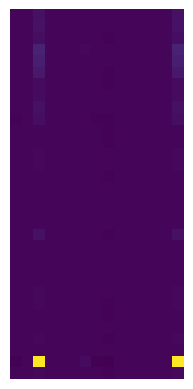

In [41]:
import numpy as np
import matplotlib.pyplot as plt

for sub in range(1,2):
    pxd = {
            "session1": {"MA": [[]], "BL": [[]]},
            "session2": {"MA": [[]], "BL": [[]]},
            "session3": {"MA": [[]], "BL": [[]]}
    }

    for i in range(1,2):
        # print(i)
        # Read the CSV file into a DataFrame
        for j in range(0,2):
            if j==0:
                df = pd.read_csv(f'./Final_data/subject_{sub}/session_{i*2}_MA.csv')
            else:
                df = pd.read_csv(f'./Final_data/subject_{sub}/session_{i*2}_BL.csv')

            # Get all columns
            columns = df.columns
            index =0
            size = 600
            ind=0
            
            while index<len(df[columns[0]]):
                ftm = []
                for cl in columns:
                    # print(cl)
                    lst = df[cl][index:index+size].tolist()
                    # print(len(lst))
                    if(len(lst)<200):
                        break
                    ft1=[]
                    ft1.append(jArithmeticMean(lst))
                    # ft1.append(np.abs(jAutoRegressiveModel(lst)).tolist())
                    x=jBandPowerAlpha(lst)
                    # print(len(x))
                    # ft1.append(x)
                    # x=jBandPowerBeta(lst)
                    # print(x)
                    # ft1.append(x)
                    # x=jBandPowerDelta(lst)
                    # print(x)
                    # ft1.append(x)
                    # ft1.append(jBandPowerGamma(lst))
                    # ft1.append(jBandPowerTheta(lst))
                    ft1.append(jFirstDifference(lst))
                    ft1.append(jHjorthActivity(lst))
                    ft1.append(jHjorthComplexity(lst))
                    ft1.append(jHjorthMobility(lst))
                    ft1.append(kurtosis(lst))
                    # ft1.append(jLogEnergyEntropy(lst))
                    # ft1.append(jLogRootSumOfSequentialVariation(lst))
                    ft1.append(jMaximum(lst))
                    # ft1.append(jMeanCurveLength(lst))
                    # ft1.append(jMeanEnergy(lst))
                    # ft1.append(jMeanTeagerEnergy(lst))
                    ft1.append(jMedian(lst))
                    ft1.append(jMinimum(lst))
                    ft1.append(jNormalizedFirstDifference(lst))
                    ft1.append(jNormalizedSecondDifference(lst))
                    # ft1.append(jRatioBandPowerAlphaBeta(lst))
                    # ft1.append(jRenyiEntropy(lst))
                    ft1.append(jSecondDifference(lst))
                     # ft1.append(jShannonEntropy(lst))
                    ft1.append(jSkewness(lst))
                    ft1.append(jStandardDeviation(lst))
                    # ft1.append(jTsallisEntropy(lst))
                    ft1.append(jVariance(lst))
                    ftm.append(ft1)
                index = index + 200
                # print(ftm)
                if len(ftm)>0:
                    plt.imshow(ftm, cmap='viridis', interpolation='nearest')
                    plt.axis('off')  # Turn off axis labels
                    plt.title('')    # Set an empty title

                # Save the plot as a JPG file
                ind +=1
                if j==0:
                    plt.savefig(f'./MAFM_image/output_image{ind}.jpg', bbox_inches='tight', pad_inches=0.1)
                else:
                    plt.savefig(f'./BLFM_image/output_image{ind}.jpg', bbox_inches='tight', pad_inches=0.1)
                